In [1]:
% reset
import os
from math import *
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from classifiers.lda import *
from classifiers.knn import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
root = 'orl_faces'
X, y = load_faces(root)
X_train = X[0:400:2,:]
X_test = X[1:400:2,:]
y_train = y[0:400:2]
y_test = y[1:400:2]


In [3]:
lda = LDA()
U = lda.train(X_train, y_train, noOfClasses=40,r=39)
assert U.shape == (39,X_train.shape[1]), "Dimensions of projection matrix not correct"

calculating S 1
calculating S 2
calculating S 3
calculating S 4
calculating S 5
calculating S 6
calculating S 7
calculating S 8
calculating S 9
calculating S 10
calculating S 11
calculating S 12
calculating S 13
calculating S 14
calculating S 15
calculating S 16
calculating S 17
calculating S 18
calculating S 19
calculating S 20
calculating S 21
calculating S 22
calculating S 23
calculating S 24
calculating S 25
calculating S 26
calculating S 27
calculating S 28
calculating S 29
calculating S 30
calculating S 31
calculating S 32
calculating S 33
calculating S 34
calculating S 35
calculating S 36
calculating S 37
calculating S 38
calculating S 39
calculating S 40
calculating B 1
calculating B 2
calculating B 3
calculating B 4
calculating B 5
calculating B 6
calculating B 7
calculating B 8
calculating B 9
calculating B 10
calculating B 11
calculating B 12
calculating B 13
calculating B 14
calculating B 15
calculating B 16
calculating B 17
calculating B 18
calculating B 19
calculating B 2

AssertionError: Dimensions of projection matrix not correct

In [8]:
with open('./lda_projection_q1.npy','wb+') as f:
    np.save(f,U)

(10304, 39)

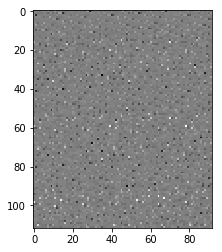

In [20]:
eigenfaces = np.real(U).reshape((-1,112,92))
face = eigenfaces[1]
plt.imshow(face)
plt.show()

In [4]:
X_train_lda = lda.project(X_train)
assert X_train_lda.shape == (X_train.shape[0], 39), "Dimensions of projected training matrix not correct."

In [5]:
# X_test_lda = lda.project(X_test)
# assert X_test_lda.shape == (X_test.shape[0], 39), "Dimensions of projected test matrix not correct."
U.shape

(39, 10304)

In [1]:
knn_1 = K_nearest_neighbour()
knn_1.train(X_train_lda, y_train)
test_predictions = knn_1.predict(X_test_lda)
train_predictions = knn_1.predict(X_train_lda)
train_accuracy = np.mean(train_predictions == y_train)
test_accuracy = np.mean(test_predictions == y_test)
print(f'training accuracy = {train_accuracy}')
print(f'testing accuracy = {test_accuracy}')

NameError: name 'K_nearest_neighbour' is not defined

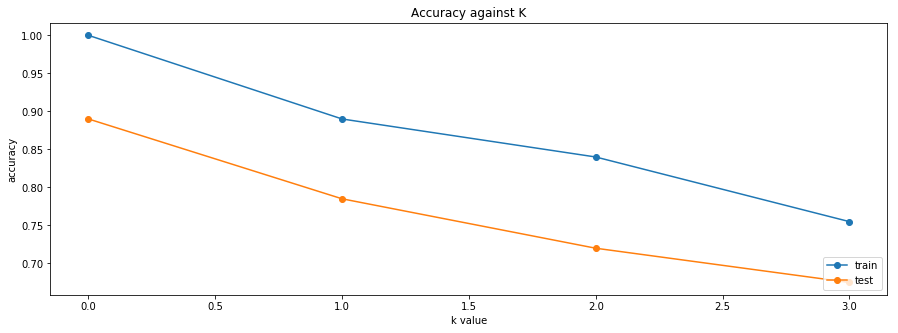

In [74]:
Ks = [1, 3, 5, 7]
train_accs, test_accs = [],[]

for k in Ks:
    knn = K_nearest_neighbour(k=k)
    knn.train(X_train_lda, y_train)
    test_predictions = knn.predict(X_test_lda)
    train_predictions = knn.predict(X_train_lda)
    train_accs.append(np.mean(train_predictions == y_train))
    test_accs.append(np.mean(test_predictions == y_test))
    
plt.plot(train_accs, '-o', label='train')
plt.plot(test_accs, '-o', label='test')
plt.legend(loc='lower right')
plt.title('Accuracy against K')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.gcf().set_size_inches(15,5)
plt.show()